<a href="https://colab.research.google.com/github/AHajibalayev/Statistical-Machine-Learning/blob/main/Linear_Classification_Ahmadagha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRACTICAL 3**

## **LINEAR CLASSIFICATION**

We are going to use the Scikit-Learn library (a great library developed by some Fench guys :)),
and we will test several classification methods

For more info, and to get the documentation about this library, please check here: https://scikit-learn.org/

We start by doing problem n°21 (from the problem list)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data set
x1 = np.array([0.5, 1, 1.5, 1.5, 2, 2.5]).reshape(-1,1)
x2 = np.array([1, 0.5, 1, 2, 1, 1.5]).reshape(-1,1)
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

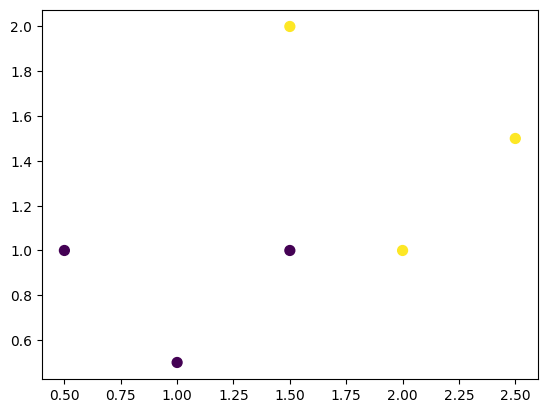

In [ ]:
# plot the data
plt.scatter(x1, x2, s=50, c=y)

## 1 : Linear Regression
Apply Linear regression to find the model's coefficients:
$$
f(x) = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

In [ ]:
# your linear regression model here
ones = np.ones((x1.shape[0], 1))
X = np.hstack([ones, x1, x2])

theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
print(f"X:\n {X}")
print(f"Theta:\n {theta}")

X:
 [[1.  0.5 1. ]
 [1.  1.  0.5]
 [1.  1.5 1. ]
 [1.  1.5 2. ]
 [1.  2.  1. ]
 [1.  2.5 1.5]]
Theta:
 [[-0.7556391 ]
 [ 0.45112782]
 [ 0.4962406 ]]


What are the obtained parameters?

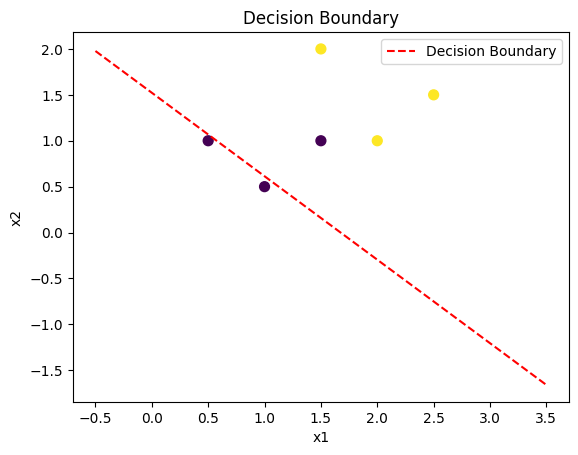

In [ ]:
# Plot the data and the decision boundary
plt.scatter(x1, x2, s=50, c=y)
# x1 range
x1_values = np.array([min(x1) - 1, max(x1) + 1])
# x2 range
x2_values = (-theta[1]*x1_values - theta[0]) / theta[2]
plt.plot(x1_values, x2_values, 'r--', label = 'Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.legend()
plt.show()

What can you conclude?

**Answer**: In my opinion, the decision boundary seems to separate between two classes (dark and yellow) but in this case, it doesn't fit very well with the given dataset

## 2: With Scikit-Learn
We will redo linear regression using scikit-learn

In [ ]:
from sklearn import linear_model

In [ ]:
# create linear regression object
regr = linear_model.LinearRegression()

# Fit the linear regression model
X = np.hstack((x1,x2))
regr.fit(X, y)
# the coefficient
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [[0.45112782 0.4962406 ]]


Do you find the same coefficients as before?

In [ ]:
theta_12 = regr.coef_
theta_0 = regr.intercept_
theta_12, theta_0

(array([[0.45112782, 0.4962406 ]]), array([-0.7556391]))

As you can see from the result above, it looks the same with the results that I obtained with linear regression part.

## 3: LDA
Now we will aplly LDA using scikit learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Fit the data with LDA and plot the decision boundary

f:\Study\Semester-2\SML\Sidibe\TP\TP1\.venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2056\2841756567.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_grid, x2_grid, Z, colors = 'blue', linewidths = 1, label='LDA Decision Boundary')


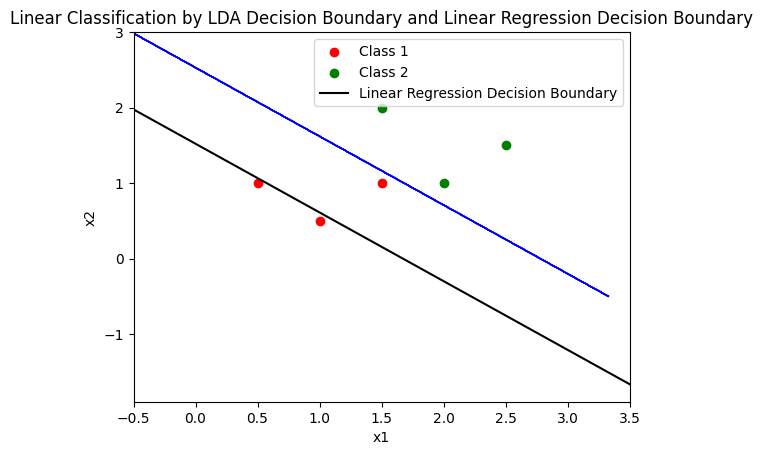

In [ ]:
lda = LDA()
lda.fit(X, y)

# plt.scatter(x1, x2, s=50, c=y)
plt.scatter(x1[y.flatten() == 0], x2[y.flatten() == 0], color = 'red', label = 'Class 1')
plt.scatter(x1[y.flatten() == 1], x2[y.flatten() == 1], color = 'green', label = 'Class 2')
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min()-1, x1.max()+1, 1000), np.linspace(x2.min()-1, x2.max()+1, 1000))

Z = lda.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
Z = Z.reshape(x1_grid.shape)

x1_range = np.array([min(x1) - 1, max(x1) + 1])
x2_range = (-theta[1]*x1_values - theta[0]) / theta[2]

plt.contour(x1_grid, x2_grid, Z, colors = 'blue', linewidths = 1, label='LDA Decision Boundary')
plt.plot(x1_range, x2_range, 'black', label='Linear Regression Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Linear Classification by LDA Decision Boundary and Linear Regression Decision Boundary')
plt.show()

What can you conclude about LDA?

**Answer:** LDA Decision Boundary in this case seems to provide a clear separation between two classes when comparing to the Linear Regression Boundary Decision. This is typical for LDA, which aims to draw a line that maximizes the separation of classes based on the available data points. On the other hand, the Linear Regression line does not separate the classes but attempts to predict a value on the y-axis (x2) given a value on the x-axis (x1). Linear Regression is not typically used for classification tasks, and this is evident in the plot because the Linear Regression line does not differentiate between the two classes effectively. It is best suited for predicting continuous outcomes rather than classifying discrete groups.


## 4: Digits Recognition
Now, we will perform digits recogntion

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

The data set consists of 8x8 pixel images stored as 8x8 arrays of grayscale values.

Let's load the data and visualize a few examples

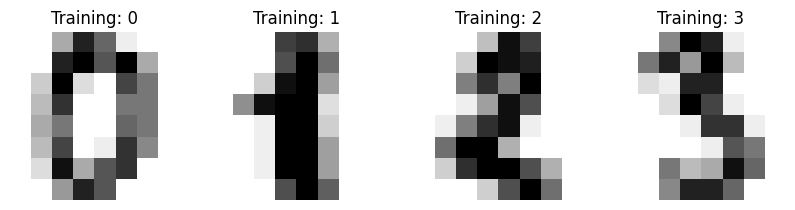

In [ ]:
# loading the data
digits = datasets.load_digits()

# visualization of 4 examples
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)


To classify the data, we first need to reshape each image into a vetcor (of size 64x1).

We then split the data into training and test subsets

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(data.shape)

(1797, 64)


In [ ]:
# split the data into 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

print(X_train.shape)
print(X_test.shape)

(1257, 64)
(540, 64)


# 4.1 : Classification
Try different classifier (NN, LDA, Logistic Regression, SVM)

For each tested classifier:
  - specify the parameters used (justify theur settings)
  - fit the model on the training data and predict the targets for test data
  - report the test accuracy
  - show confusion matrix

Draw some conclusions (which method is best? what are common mistakes? etc)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Purples)
    plt.title(title)
    plt.show()

K-Nearest Neighbors Accuracy: 96.48 %


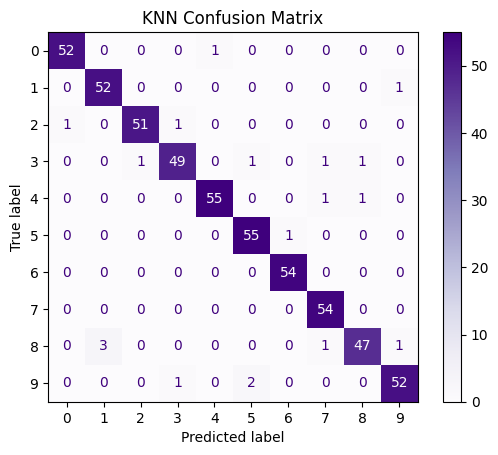

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Predict the targets for the test data
knn_pred = knn_clf.predict(X_test)

# Test accuracy
knn_accuracy = accuracy_score(y_test, knn_pred) * 100
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f} %")

# Show confusion matrix
plot_confusion_matrix(y_test, knn_pred, classes=np.unique(y_test), title='KNN Confusion Matrix')

LDA Accuracy: 90.37 %


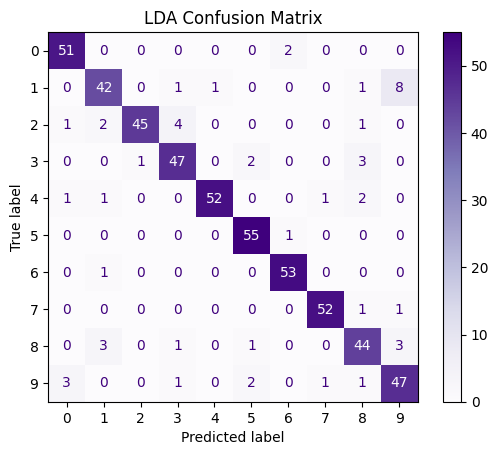

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA classifier
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_pred = lda_clf.predict(X_test)

# Test accuracy
lda_accuracy = accuracy_score(y_test, lda_pred) * 100
print(f"LDA Accuracy: {lda_accuracy:.2f} %")

# Show confusion matrix
plot_confusion_matrix(y_test, lda_pred, classes=np.unique(y_test), title='LDA Confusion Matrix')

Logistic Regression Accuracy: 92.22 %


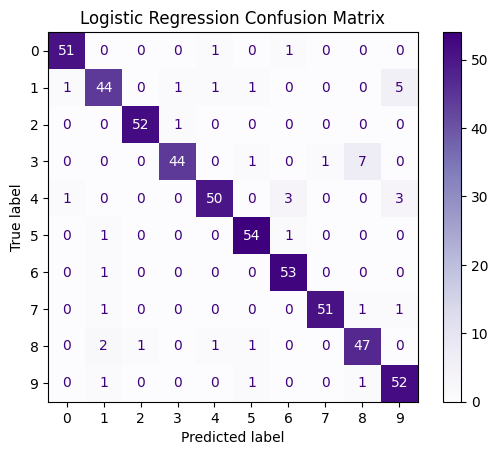

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic regression classifier
logreg_clf = LogisticRegression(max_iter=10000, random_state=42)
logreg_clf.fit(X_train, y_train)
logreg_pred = logreg_clf.predict(X_test)

# Test accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred) * 100
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f} %")

# Show confusion matrix
plot_confusion_matrix(y_test, logreg_pred, classes=np.unique(y_test), title='Logistic Regression Confusion Matrix')

SVM Accuracy: 93.33 %


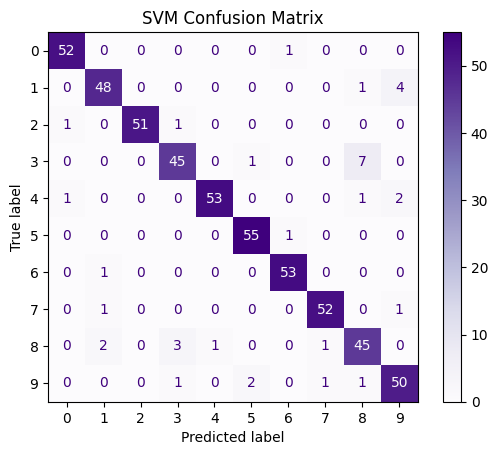

In [ ]:
from sklearn.svm import SVC

# SVM classifier for multi-class classification
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

# Report the test accuracy
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
print(f"SVM Accuracy: {svm_accuracy:.2f} %")

# Show confusion matrix
plot_confusion_matrix(y_test, svm_pred, classes=np.unique(y_test), title='SVM Confusion Matrix')

Draw some conclusions (which method is best? what are common mistakes? etc)

**Answer**:

- The diagonal elements of each matrix represent correct classifications. Each model seems to be performing relatively well, as the main diagonals have the highest numbers, indicating a higher number of correct predictions. To determine the best model, we just compare the accuracy score of each methods. However, visually, the KNN model have confusion matrices with predominantly higher numbers on the diagonal and fewer off-diagonal (misclassification) numbers, which might suggest these models are slightly more accurate than the others.

- Common mistakes:
    - Misclassifications are sporadic across various classes, without a dominant error trend. However, certain patterns can be noted. For instance, there are a few instances where the class 8 is misclassified as class 1, and class 9 is sometimes misclassified as class 5 or 7.
    - In general, some samples in dataset can be hard to classify between each classes or some samples looks quite similar which leads to be misclassified

